# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [40]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [ ]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

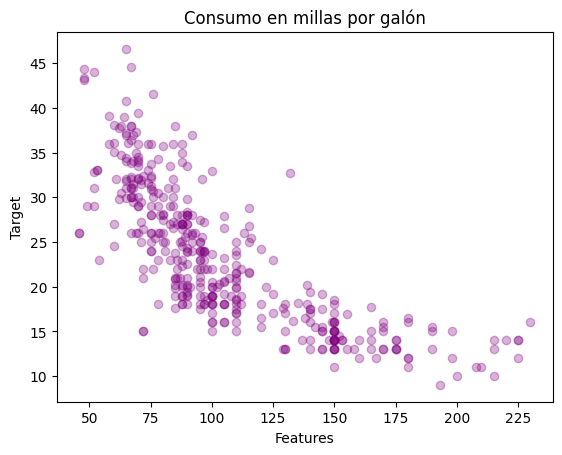

In [4]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    
    plt.scatter(df[nombre_columna], y, c="purple", alpha=0.3)
    plt.xlabel("Features")
    plt.ylabel("Target")
    plt.title("Consumo en millas por galón")
    plt.show()

visualiza(X, y, 'horsepower')

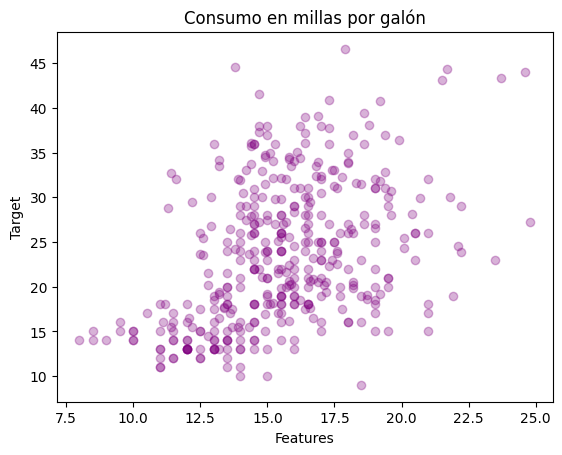

In [49]:
visualiza(X, y, 'acceleration')

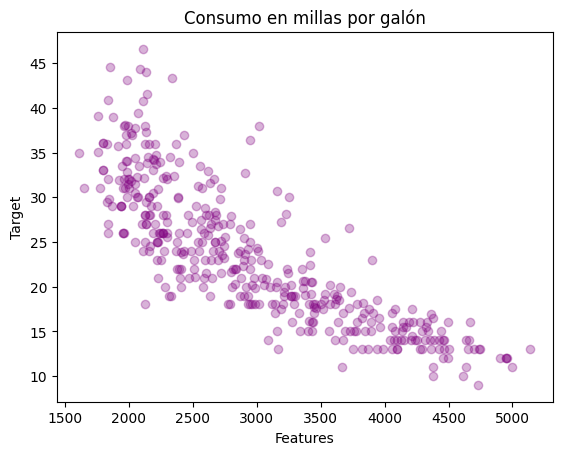

In [50]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, lo mostramos por pantalla y salimos de la función. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [19]:
import numpy as np

print(X.shape)
print(y.shape)

(398, 7)
(398, 1)


In [24]:
import numpy as np

def pesos_ols(X, y):
    
    X_array = np.asarray(X)
    y_array = np.asarray(y)


    if y_array.ndim == 1:
        y_array = y_array.reshape(-1, 1)

        
    n = X_array.shape[0]
    d = X_array.shape[1]

 
    if d > n:
        return None

    
    ones = np.ones((n, 1))
    X_intercept = np.hstack((ones, X_array))

   
    w = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y_array

    return w

    

In [26]:
# Arrays de prueba!! No son dataset reales y no hace falta que los dibujemos

import numpy as np

X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

In [27]:
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]]).reshape(10,2)
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

array([[ 1.98968523e+05],
       [ 7.36278026e+01],
       [-8.63759760e+01]])

Hasta aquí hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10, pero aún no lo hemos probado con ningún dataset real. 

### 1.3 Prueba del modelo en los datos de consumo de coches

Ahora sí, ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

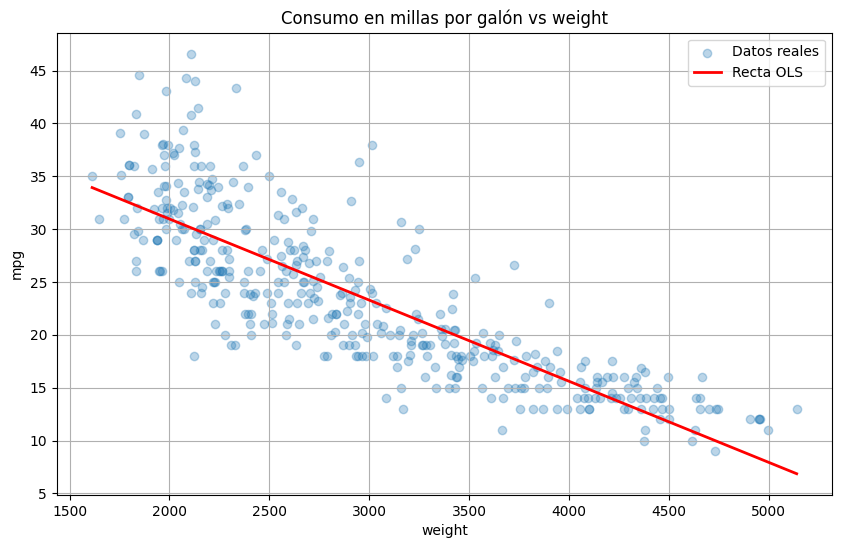

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo



auto_mpg = fetch_ucirepo(id=9)


X = auto_mpg.data.features
y = auto_mpg.data.targets




df = X[['weight']].copy()
df['mpg'] = y


df = df.dropna()


X_w = df[['weight']]
y_w = df[['mpg']]



def pesos_ols(X, y):
    
    X_array = np.asarray(X)
    y_array = np.asarray(y)

    
    if y_array.ndim == 1:
        y_array = y_array.reshape(-1, 1)

    # Dimensiones
    n = X_array.shape[0]   # observaciones
    d = X_array.shape[1]   # features

    # Control del enunciado
    if d > n:
        print("Más features que observaciones")
        return None

    # Añadir intercepto (columna de 1s)
    ones = np.ones((n, 1))
    X_intercept = np.hstack((ones, X_array))

    # Fórmula OLS: (XᵀX)⁻¹ Xᵀ y
    w = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y_array

    return w

w = pesos_ols(X_w, y_w)

X_array = np.asarray(X_w)
y_array = np.asarray(y_w)

ones = np.ones((X_array.shape[0], 1))
X_intercept = np.hstack((ones, X_array))

y_pred = X_intercept @ w


idx = np.argsort(X_array[:, 0])
X_sorted = X_array[idx]
y_pred_sorted = y_pred[idx]


plt.figure(figsize=(10, 6))

plt.scatter(X_array, y_array, alpha=0.3, label="Datos reales")
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Recta OLS")

plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Consumo en millas por galón vs weight")
plt.legend()
plt.grid(True)

plt.show()


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [34]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn (solo hay que ver si coincide o no para saber si te has equivocado en algún punto). Si coincide, ¡enhorabuena! Ya sabes implementar tu primer modelo de Machine Learning desde la base.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



In [ ]:
#El método de mínimos cuadrados obtiene los coeficientes de la regresión 
# lineal de forma directa mediante una fórmula matemática, 
# sin necesidad de iteraciones. Es un método rápido y exacto para 
# conjuntos de datos pequeños o medianos.

#En cambio, el descenso del gradiente es un método iterativo que ajusta 
# los coeficientes progresivamente para minimizar el error. Depende de parámetros 
# como la tasa de aprendizaje y el número de iteraciones.

#Ambos métodos buscan minimizar el mismo error, pero difieren
# en la forma de obtener los coeficientes: uno de manera directa y el otro 
# de forma iterativa.

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 

    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    w = np.asarray(w0, dtype=float)

    
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    
    loss_iter = [np.inf]
    w_iter = [w.copy()]

    
    n = X.shape[0]
    ones = np.ones((n, 1))
    Xb = np.hstack((ones, X))   

    
    for _ in range(n_iter):
        
        y_hat = Xb @ w              

        
        e = y_hat - y               

        
        loss = 0.5 * np.mean(e**2)  

        
        grad = (Xb.T @ e) / n       

        
        w = w - eta * grad

        
        w_iter.append(w.copy())
        loss_iter.append(loss)

    return np.array(w_iter), np.array(loss_iter)



eta = 1e-6
iteraciones = 2000

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000], dtype=float).reshape((5,1))
X = np.array([[ 0.37020659],
              [-0.48234664],
              [ 0.51483616],
              [ 0.38352774],
              [ 1.29888065]], dtype=float)

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print("Últimos pesos:\n", weights[-1])
print("Última loss:\n", loss[-1])


Últimos pesos:
 [[401.61348533]
 [193.27164651]]
Última loss:
 20747568024.62526


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)


(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

X_np shape: (398, 1)
y_np shape: (398, 1)
w_final:
 [[23.51457286]
 [-6.49270202]]
loss_final: 9.390469867314197


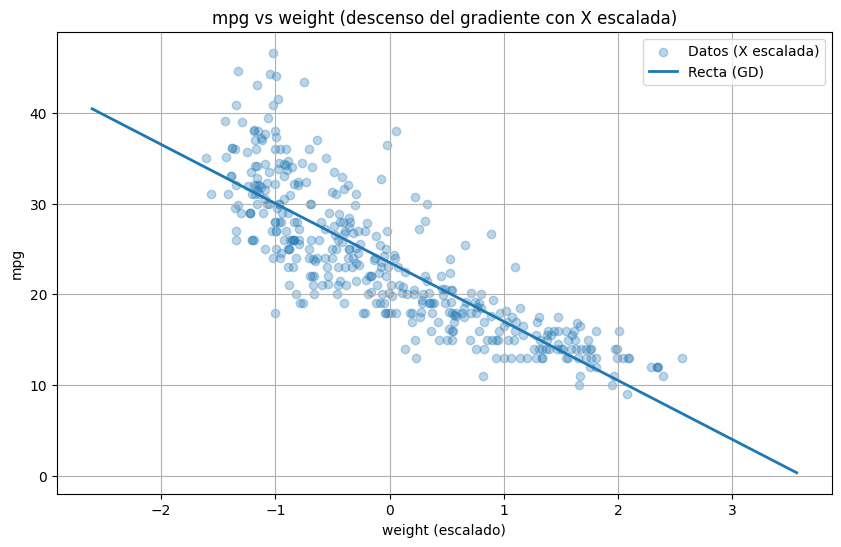

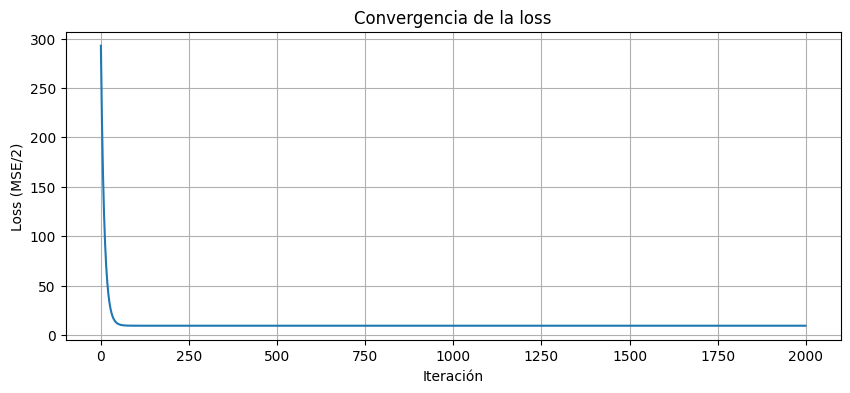

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features
y = auto_mpg.data.targets


df = X[['weight']].copy()
df['mpg'] = y
df = df.dropna()

X_np = df[['weight']].to_numpy(dtype=float)   # (n,1)
y_np = df[['mpg']].to_numpy(dtype=float)      # (n,1)

print("X_np shape:", X_np.shape)
print("y_np shape:", y_np.shape)


X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = y_np


np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

eta = 0.05        
iteraciones = 2000


weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)
w_final = weights[-1]   

print("w_final:\n", w_final)
print("loss_final:", loss[-1])


x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1

x_line = np.linspace(x_min, x_max, 200).reshape(-1, 1)  


y_line = w_final[0,0] + w_final[1,0] * x_line

plt.figure(figsize=(10,6))
plt.scatter(X_gd, y_gd, alpha=0.3, label="Datos (X escalada)")
plt.plot(x_line, y_line, linewidth=2, label="Recta (GD)")
plt.xlabel("weight (escalado)")
plt.ylabel("mpg")
plt.title("mpg vs weight (descenso del gradiente con X escalada)")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10,4))
plt.plot(loss[1:])  
plt.xlabel("Iteración")
plt.ylabel("Loss (MSE/2)")
plt.title("Convergencia de la loss")
plt.grid(True)
plt.show()
